In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ymiah12/BiomarkerData/main/BLENNOWPLASMATAU.csv')
df.head()

,RID,VISCODE,USERDATE,EXAMDATE,VOL,PLASMATAU,COMMENT,update_stamp
0,2,bl,2015-08-04,2005-09-08,0.50 ML,2.41,NaN,2015-08-05 09:12:21.0
1,3,bl,2015-08-04,2005-09-12,0.50 ML,3.84,NaN,2015-08-05 09:12:21.0
2,4,bl,2015-08-04,2005-11-08,0.50 ML,3.76,NaN,2015-08-05 09:12:21.0
3,5,bl,2015-08-04,2005-09-07,0.50 ML,3.81,NaN,2015-08-05 09:12:21.0
4,6,bl,2015-08-04,2005-11-29,0.50 ML,2.86,NaN,2015-08-05 09:12:21.0


In [ ]:
df['hasPTAU'] = df.apply(lambda row: row.PLASMATAU > 1, axis=1)
df

,RID,VISCODE,USERDATE,EXAMDATE,VOL,PLASMATAU,COMMENT,update_stamp,hasPTAU
0,2,bl,2015-08-04,2005-09-08,0.50 ML,2.41,NaN,2015-08-05 09:12:21.0,True
1,3,bl,2015-08-04,2005-09-12,0.50 ML,3.84,NaN,2015-08-05 09:12:21.0,True
2,4,bl,2015-08-04,2005-11-08,0.50 ML,3.76,NaN,2015-08-05 09:12:21.0,True
3,5,bl,2015-08-04,2005-09-07,0.50 ML,3.81,NaN,2015-08-05 09:12:21.0,True
4,6,bl,2015-08-04,2005-11-29,0.50 ML,2.86,NaN,2015-08-05 09:12:21.0,True
...,...,...,...,...,...,...,...,...,...
576,1414,bl,2015-08-04,2007-08-23,0.50 ML,1.45,NaN,2015-08-05 09:12:21.0,True
577,1419,bl,2015-08-04,2007-08-21,0.50 ML,1.56,NaN,2015-08-05 09:12:21.0,True
578,1423,bl,2015-08-04,2007-08-14,0.50 ML,2.77,NaN,2015-08-05 09:12:21.0,True
579,1430,bl,2015-08-04,2007-09-21,0.50 ML,2.54,NaN,2015-08-05 09:12:21.0,True


In [ ]:
df = df[['RID','VOL','PLASMATAU','hasPTAU']]

df.head()

,RID,VOL,PLASMATAU,hasPTAU
0,2,0.50 ML,2.41,True
1,3,0.50 ML,3.84,True
2,4,0.50 ML,3.76,True
3,5,0.50 ML,3.81,True
4,6,0.50 ML,2.86,True


In [ ]:
df.dropna()

,RID,VOL,PLASMATAU,hasPTAU
0,2,0.50 ML,2.41,True
1,3,0.50 ML,3.84,True
2,4,0.50 ML,3.76,True
3,5,0.50 ML,3.81,True
4,6,0.50 ML,2.86,True
...,...,...,...,...
576,1414,0.50 ML,1.45,True
577,1419,0.50 ML,1.56,True
578,1423,0.50 ML,2.77,True
579,1430,0.50 ML,2.54,True


In [ ]:
df['VOL'] = df["VOL"].str.replace("ML","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


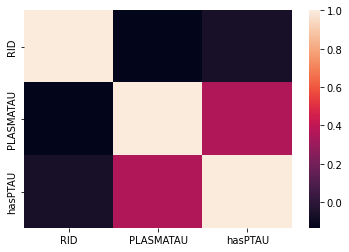

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1)
sns.heatmap(df.corr())

In [ ]:
df = df[["RID", "VOL", "hasPTAU"]]

In [ ]:
y = np.asarray(df["hasPTAU"])

y.shape

(581,)

In [ ]:
x = df.iloc[:,:-1]

x.shape

(581, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
df.isnull().any()

RID        False
VOL        False
hasPTAU    False
dtype: bool

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)


svm.score(x_test,y_test)

0.9246575342465754

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

rfc.score(x_test,y_test)

0.8698630136986302

In [ ]:
predicted_values = svm.predict(x_test)
actual_values = y_test

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score 

score_f1 = f1_score(actual_values, predicted_values)
score_precision = precision_score(actual_values, predicted_values)
score_recall = recall_score(actual_values, predicted_values)
score_accuracy = accuracy_score(actual_values, predicted_values)

print(score_f1, score_precision, score_recall, score_accuracy)

0.9608540925266905 0.9246575342465754 1.0 0.9246575342465754
